How much price changes acts like a white noise:
- check diff mean on different a periods
- check diff relative std on different a periods
- check diff ljung box q-test on different a periods
- check price direction statistics on different direction periods

In [1]:
import pandas as pd
import numpy as np
import os
from os import path

In [2]:
symbols = pd.read_csv("D:\Trading\sp500_symbols_list.csv")

In [3]:
tickers_path = "D:\\Trading\\raw_data\\tickers"

In [4]:
tickers_dfs = [pd.read_csv(path.join(tickers_path, f"{ticker}.csv"), parse_dates=True, index_col="Date") for ticker in symbols['Symbol']]

### Global change

In [100]:
global_changes = np.array([(df["Close"].iloc[-1] - df["Close"].iloc[0]) / df["Close"].iloc[0] for df in tickers_dfs])
print(f"Mean: {global_changes.mean()}")
print(f"Std: {global_changes.std()}")
print(f"Median: {np.quantile(global_changes, 0.5)}")
print(f"75% percintile: {np.quantile(global_changes, 0.75)}")
print(f"25% percintile: {np.quantile(global_changes, 0.25)}")
print(f"Max: {np.max(global_changes)}")
print(f"Min: {np.min(global_changes)}")

Mean: 28.67160345005366
Std: 82.0881158891766
Median: 10.91735120079738
75% percintile: 26.850378832910778
25% percintile: 3.27456410743514
Max: 883.2785404738852
Min: -0.9144285633342085


### One day change

#### Full changes

Sign changes

In [107]:
mean_diffs = np.array([df["Close"].diff().mean() for df in tickers_dfs])
print(f"Mean: {mean_diffs.mean()}")
print(f"Std: {mean_diffs.std()}")
print(f"Median: {np.quantile(mean_diffs, 0.5)}")
print(f"75% percintile: {np.quantile(mean_diffs, 0.75)}")
print(f"25% percintile: {np.quantile(mean_diffs, 0.25)}")
print(f"Max: {np.max(mean_diffs)}")
print(f"Min: {np.min(mean_diffs)}")

Mean: 0.03695114472164353
Std: 0.04761813834549959
Median: 0.023785825600271766
75% percintile: 0.0449788509592995
25% percintile: 0.010450578264236893
Max: 0.35016882897724394
Min: -0.1275659096325348


Abs changes

In [104]:
median_abs_diffs = np.array([np.abs(df["Close"].diff()).median() for df in tickers_dfs])
print(f"Mean: {median_abs_diffs.mean()}")
print(f"Std: {median_abs_diffs.std()}")
print(f"Median: {np.quantile(median_abs_diffs, 0.5)}")
print(f"75% percintile: {np.quantile(median_abs_diffs, 0.75)}")
print(f"25% percintile: {np.quantile(median_abs_diffs, 0.25)}")
print(f"Max: {np.max(median_abs_diffs)}")
print(f"Min: {np.min(median_abs_diffs)}")

Mean: 0.4196364066085299
Std: 0.26986913748847524
Median: 0.3706231117248491
75% percintile: 0.5163554549217224
25% percintile: 0.23797202110290483
Max: 1.779998779296875
Min: 0.029375016689300537


#### Relative changes

Sign changes

In [108]:
mean_pct_changes = np.array([df["Close"].pct_change().mean() for df in tickers_dfs])
print(f"Mean: {mean_pct_changes.mean()}")
print(f"Std: {mean_pct_changes.std()}")
print(f"Median: {np.quantile(mean_pct_changes, 0.5)}")
print(f"75% percintile: {np.quantile(mean_pct_changes, 0.75)}")
print(f"25% percintile: {np.quantile(mean_pct_changes, 0.25)}")
print(f"Max: {np.max(mean_pct_changes)}")
print(f"Min: {np.min(mean_pct_changes)}")

Mean: 0.0007750250509954834
Std: 0.0003041425339456493
Median: 0.0007290321246123759
75% percintile: 0.0009255613493289743
25% percintile: 0.0005672262616528433
Max: 0.002251801750850783
Min: 0.0001881340692730979


Abs changes

In [106]:
median_abs_pct_changes = np.array([np.abs(df["Close"].pct_change()).median() for df in tickers_dfs])
print(f"Mean: {median_abs_pct_changes.mean()}")
print(f"Std: {median_abs_pct_changes.std()}")
print(f"Median: {np.quantile(median_abs_pct_changes, 0.5)}")
print(f"75% percintile: {np.quantile(median_abs_pct_changes, 0.75)}")
print(f"25% percintile: {np.quantile(median_abs_pct_changes, 0.25)}")
print(f"Max: {np.max(median_abs_pct_changes)}")
print(f"Min: {np.min(median_abs_pct_changes)}")

Mean: 0.010786602551968201
Std: 0.0027131689611439597
Median: 0.01031745991292371
75% percintile: 0.012116910016144067
25% percintile: 0.008782427374735197
Max: 0.025145089462765946
Min: 0.006472151616626731


### Анализ трендов

Минимальная длина тренда - 8 дней. Если выполняется r2 >= 0.8 - +1 день и снова строим регрессию, так пока условие не перестанет выполняться, либо регрессия не поменяет знак параметра. Сохраняем длину тренда и его изменение. Начинаем новую регрессию по следующим 8 дням, если регрессии нет, делаем сдвиг на 1 день.

In [95]:
from detect_trends import detect_trends

In [96]:
from tqdm import tqdm

In [98]:
import matplotlib.pyplot as plt

In [112]:
trends_len_list, trends_val_list, trends_gain_list = [], [], []
for df in tqdm(tickers_dfs):
    trends_len, trends_val, trends_late_gain, trends_starts = detect_trends(df["Close"],
                                                                            min_trend_len=8,
                                                                            max_trend_len=100,
                                                                            min_r2=0.8,
                                                                            min_trend_dir=0.005)
    trends_len_list.append(trends_len)
    trends_val_list.append(trends_val)
    trends_gain_list.append(trends_late_gain)

 68%|██████████████████████████████████████████████████████▍                         | 151/222 [07:35<03:32,  2.99s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
 91%|█████████████████████████████████████████████████████████████████████████▏      | 203/222 [10:10<01:00,  3.19s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\

Median percintiles for trend length

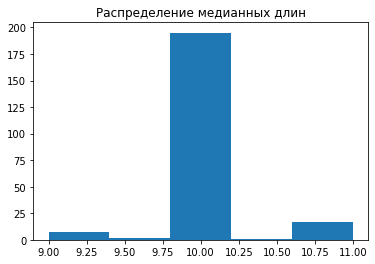

In [113]:
median_lens = [np.quantile(l, 0.5) for l in trends_len_list]
plt.hist(x=median_lens, bins=len(np.unique(median_lens)))
plt.title("Распределение медианных длин")
plt.show()

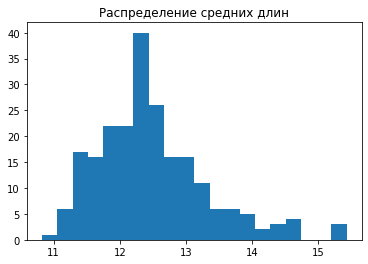

In [114]:
mean_lens = [np.mean(l) for l in trends_len_list]
plt.hist(x=mean_lens, bins=20)
plt.title("Распределение средних длин")
plt.show()

Median percintiles for trend value gain

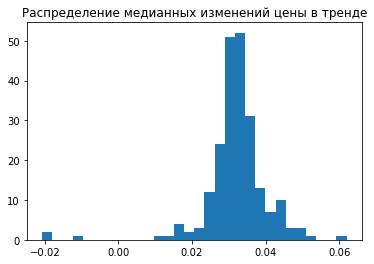

In [115]:
median_vals = [np.quantile(l, 0.5) for l in trends_val_list]
plt.hist(x=median_vals, bins=30)
plt.title("Распределение медианных изменений цены в тренде")
plt.show()

Медианная доходность следования по сформировавшемуся тренду. Открываем позицию если обнаружили тренд, закрываем если тренд закончился. Относительная разница - доход.

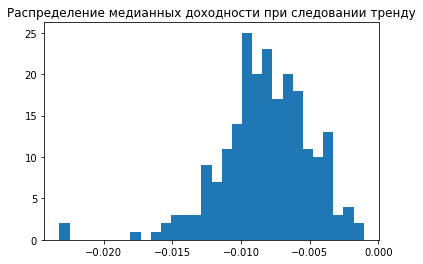

In [116]:
median_gains = [np.quantile(l, 0.5) for l in trends_gain_list]
plt.hist(x=median_gains, bins=30)
plt.title("Распределение медианных доходности при следовании тренду")
plt.show()

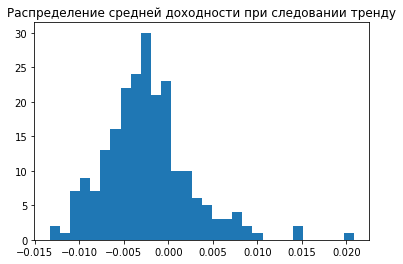

In [117]:
mean_gains = [np.mean(l) for l in trends_gain_list]
plt.hist(x=mean_gains, bins=30)
plt.title("Распределение средней доходности при следовании тренду")
plt.show()

Mean time coverage

In [118]:
print(f"Mean percentage of trend days in all: {100 * np.mean([trends_len_list[i].sum() / tickers_dfs[i].shape[0] for i in range(len(tickers_dfs))])}%")

Mean percentage of trend days in all: 43.65120937753605%


##### При более короткой базовой длине тренда.

In [119]:
trends_len_list, trends_val_list, trends_gain_list = [], [], []
for df in tqdm(tickers_dfs):
    trends_len, trends_val, trends_late_gain, trends_starts = detect_trends(df["Close"],
                                                                            min_trend_len=5,
                                                                            max_trend_len=100,
                                                                            min_r2=0.8,
                                                                            min_trend_dir=0.005)
    trends_len_list.append(trends_len)
    trends_val_list.append(trends_val)
    trends_gain_list.append(trends_late_gain)

 25%|████████████████████                                                             | 55/222 [02:46<08:41,  3.12s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
 64%|███████████████████████████████████████████████████▏                            | 142/222 [07:06<03:53,  2.91s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
 68%|██████████████████████████████████████████████████████▍                         | 151/222 [07:34<03:33,  3.00s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1

Median percintiles for trend length

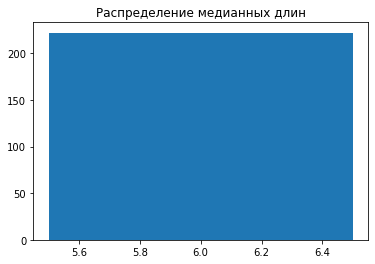

In [120]:
median_lens = [np.quantile(l, 0.5) for l in trends_len_list]
plt.hist(x=median_lens, bins=len(np.unique(median_lens)))
plt.title("Распределение медианных длин")
plt.show()

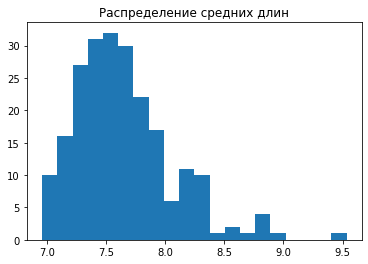

In [121]:
mean_lens = [np.mean(l) for l in trends_len_list]
plt.hist(x=mean_lens, bins=20)
plt.title("Распределение средних длин")
plt.show()

Median percintiles for trend value gain

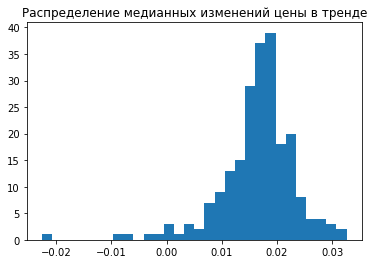

In [122]:
median_vals = [np.quantile(l, 0.5) for l in trends_val_list]
plt.hist(x=median_vals, bins=30)
plt.title("Распределение медианных изменений цены в тренде")
plt.show()

Медианная доходность следования по сформировавшемуся тренду. Открываем позицию если обнаружили тренд, закрываем если тренд закончился. Относительная разница - доход.

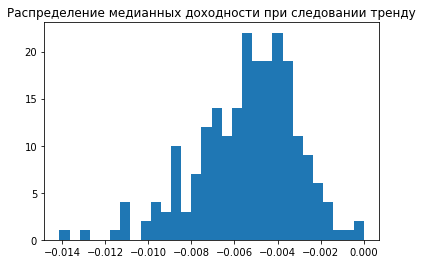

In [123]:
median_gains = [np.quantile(l, 0.5) for l in trends_gain_list]
plt.hist(x=median_gains, bins=30)
plt.title("Распределение медианных доходности при следовании тренду")
plt.show()

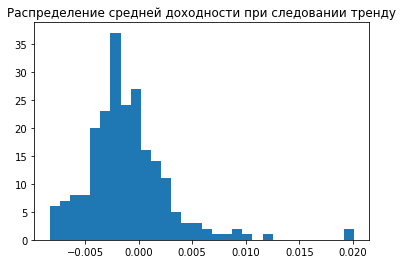

In [124]:
mean_gains = [np.mean(l) for l in trends_gain_list]
plt.hist(x=mean_gains, bins=30)
plt.title("Распределение средней доходности при следовании тренду")
plt.show()

Mean time coverage

In [125]:
print(f"Mean percentage of trend days in all: {100 * np.mean([trends_len_list[i].sum() / tickers_dfs[i].shape[0] for i in range(len(tickers_dfs))])}%")

Mean percentage of trend days in all: 46.165826868781885%


##### При более жестких условиях отбора.

In [126]:
trends_len_list, trends_val_list, trends_gain_list = [], [], []
for df in tqdm(tickers_dfs):
    trends_len, trends_val, trends_late_gain, trends_starts = detect_trends(df["Close"], min_trend_len=8, max_trend_len=100, min_r2=0.9, min_trend_dir=0.0075)
    trends_len_list.append(trends_len)
    trends_val_list.append(trends_val)
    trends_gain_list.append(trends_late_gain)

 68%|██████████████████████████████████████████████████████▍                         | 151/222 [08:21<03:51,  3.26s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
 91%|█████████████████████████████████████████████████████████████████████████▏      | 203/222 [11:13<01:06,  3.50s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\

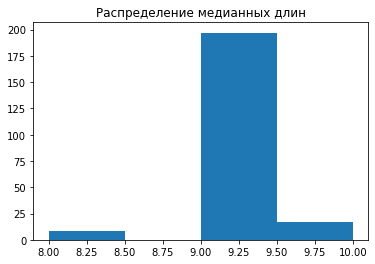

In [127]:
median_lens = [np.quantile(l, 0.5) for l in trends_len_list]
plt.hist(x=median_lens, bins=len(np.unique(median_lens)))
plt.title("Распределение медианных длин")
plt.show()

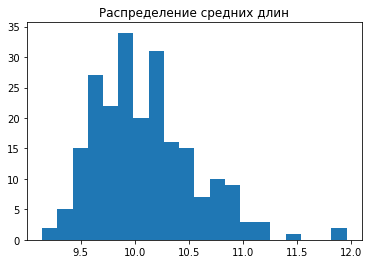

In [128]:
mean_lens = [np.mean(l) for l in trends_len_list]
plt.hist(x=mean_lens, bins=20)
plt.title("Распределение средних длин")
plt.show()

Median percintiles for trend value gain

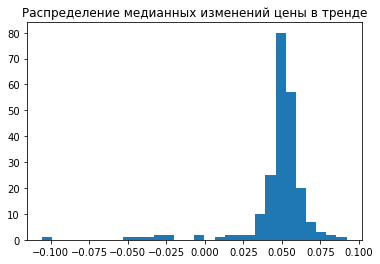

In [129]:
median_vals = [np.quantile(l, 0.5) for l in trends_val_list]
plt.hist(x=median_vals, bins=30)
plt.title("Распределение медианных изменений цены в тренде")
plt.show()

Медианная доходность следования по сформировавшемуся тренду. Открываем позицию если обнаружили тренд, закрываем если тренд закончился. Относительная разница - доход.

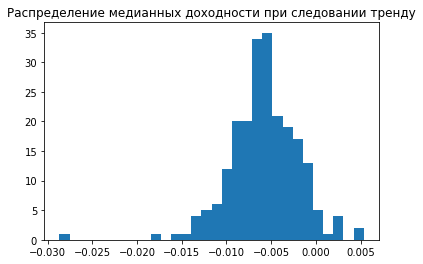

In [130]:
median_gains = [np.quantile(l, 0.5) for l in trends_gain_list]
plt.hist(x=median_gains, bins=30)
plt.title("Распределение медианных доходности при следовании тренду")
plt.show()

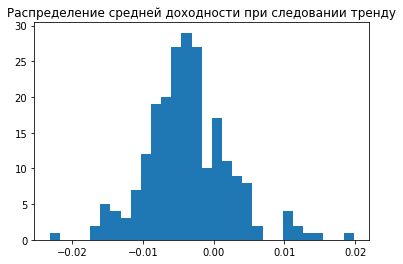

In [131]:
mean_gains = [np.mean(l) for l in trends_gain_list]
plt.hist(x=mean_gains, bins=30)
plt.title("Распределение средней доходности при следовании тренду")
plt.show()

Mean time coverage

In [132]:
print(f"Mean percentage of trend days in all: {100 * np.mean([trends_len_list[i].sum() / tickers_dfs[i].shape[0] for i in range(len(tickers_dfs))])}%")

Mean percentage of trend days in all: 14.687036700900855%


##### При большой длине базового периода.

In [133]:
trends_len_list, trends_val_list, trends_gain_list = [], [], []
for df in tqdm(tickers_dfs):
    trends_len, trends_val, trends_late_gain, trends_starts = detect_trends(df["Close"], min_trend_len=15, max_trend_len=100, min_r2=0.8, min_trend_dir=0.005)
    trends_len_list.append(trends_len)
    trends_val_list.append(trends_val)
    trends_gain_list.append(trends_late_gain)

 91%|█████████████████████████████████████████████████████████████████████████▏      | 203/222 [10:01<00:59,  3.15s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in 

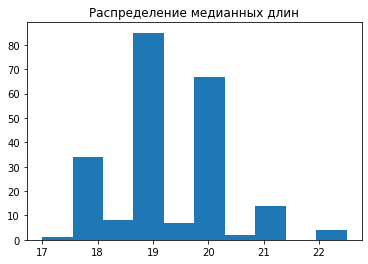

In [134]:
median_lens = [np.quantile(l, 0.5) for l in trends_len_list]
plt.hist(x=median_lens, bins=len(np.unique(median_lens)))
plt.title("Распределение медианных длин")
plt.show()

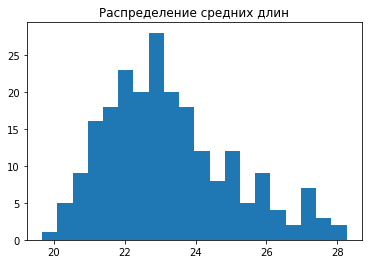

In [135]:
mean_lens = [np.mean(l) for l in trends_len_list]
plt.hist(x=mean_lens, bins=20)
plt.title("Распределение средних длин")
plt.show()

Median percintiles for trend value gain

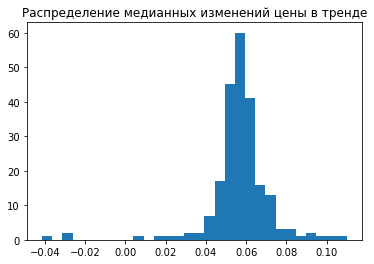

In [136]:
median_vals = [np.quantile(l, 0.5) for l in trends_val_list]
plt.hist(x=median_vals, bins=30)
plt.title("Распределение медианных изменений цены в тренде")
plt.show()

Медианная доходность следования по сформировавшемуся тренду. Открываем позицию если обнаружили тренд, закрываем если тренд закончился. Относительная разница - доход.

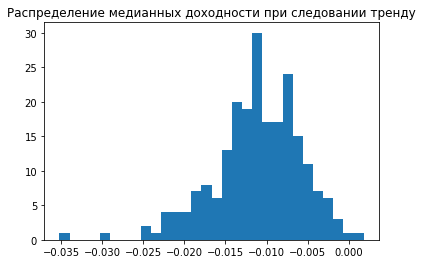

In [137]:
median_gains = [np.quantile(l, 0.5) for l in trends_gain_list]
plt.hist(x=median_gains, bins=30)
plt.title("Распределение медианных доходности при следовании тренду")
plt.show()

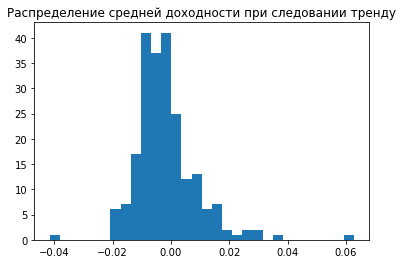

In [138]:
mean_gains = [np.mean(l) for l in trends_gain_list]
plt.hist(x=mean_gains, bins=30)
plt.title("Распределение средней доходности при следовании тренду")
plt.show()

Mean time coverage

In [139]:
print(f"Mean percentage of trend days in all: {100 * np.mean([trends_len_list[i].sum() / tickers_dfs[i].shape[0] for i in range(len(tickers_dfs))])}%")

Mean percentage of trend days in all: 39.899587746944526%


##### При стандартной базовой длине тренда и более мягких условиях отбора.

In [140]:
trends_len_list, trends_val_list, trends_gain_list = [], [], []
for df in tqdm(tickers_dfs):
    trends_len, trends_val, trends_late_gain, trends_starts = detect_trends(df["Close"], min_trend_len=8, max_trend_len=100, min_r2=0.75, min_trend_dir=0.0025)
    trends_len_list.append(trends_len)
    trends_val_list.append(trends_val)
    trends_gain_list.append(trends_late_gain)

 68%|██████████████████████████████████████████████████████▍                         | 151/222 [07:31<03:32,  2.99s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
 91%|█████████████████████████████████████████████████████████████████████████▏      | 203/222 [10:09<00:59,  3.15s/it]C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Dell\

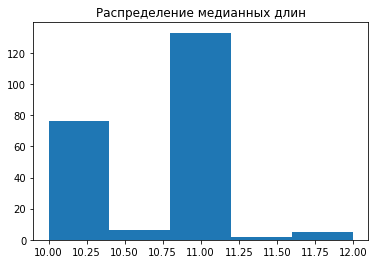

In [141]:
median_lens = [np.quantile(l, 0.5) for l in trends_len_list]
plt.hist(x=median_lens, bins=len(np.unique(median_lens)))
plt.title("Распределение медианных длин")
plt.show()

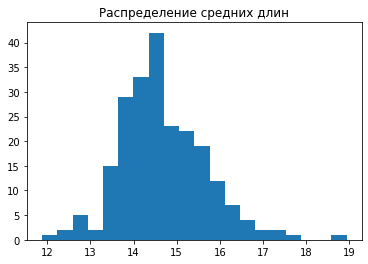

In [142]:
mean_lens = [np.mean(l) for l in trends_len_list]
plt.hist(x=mean_lens, bins=20)
plt.title("Распределение средних длин")
plt.show()

Median percintiles for trend value gain

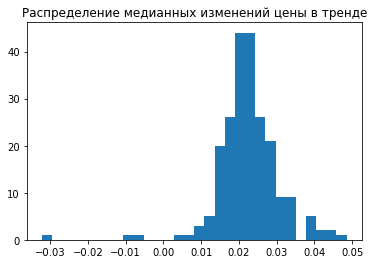

In [143]:
median_vals = [np.quantile(l, 0.5) for l in trends_val_list]
plt.hist(x=median_vals, bins=30)
plt.title("Распределение медианных изменений цены в тренде")
plt.show()

Медианная доходность следования по сформировавшемуся тренду. Открываем позицию если обнаружили тренд, закрываем если тренд закончился. Относительная разница - доход.

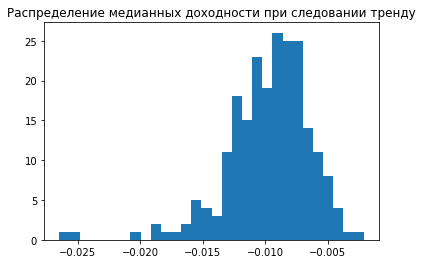

In [144]:
median_gains = [np.quantile(l, 0.5) for l in trends_gain_list]
plt.hist(x=median_gains, bins=30)
plt.title("Распределение медианных доходности при следовании тренду")
plt.show()

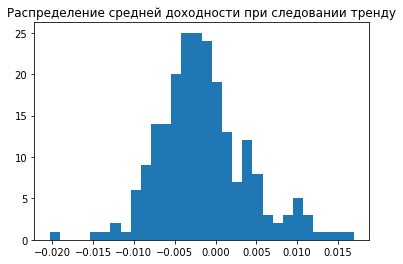

In [145]:
mean_gains = [np.mean(l) for l in trends_gain_list]
plt.hist(x=mean_gains, bins=30)
plt.title("Распределение средней доходности при следовании тренду")
plt.show()

Mean time coverage

In [146]:
print(f"Mean percentage of trend days in all: {100 * np.mean([trends_len_list[i].sum() / tickers_dfs[i].shape[0] for i in range(len(tickers_dfs))])}%")

Mean percentage of trend days in all: 58.89708592922893%


## тест Льюнга-Бокса

In [66]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [90]:
lb_stats = np.array([acorr_ljungbox(x=df["Close"].diff().iloc[1:], lags=[10], return_df=True)["lb_pvalue"] for df in tickers_dfs]).flatten()

In [92]:
pd.Series(lb_stats).describe()

count     2.220000e+02
mean      2.789269e-02
std       9.907145e-02
min      2.008124e-164
25%       3.444156e-21
50%       2.967673e-09
75%       9.844387e-04
max       7.952854e-01
dtype: float64

In [93]:
lb_stats = np.array([acorr_ljungbox(x=df["Close"].diff().iloc[1:], lags=[5], return_df=True)["lb_pvalue"] for df in tickers_dfs]).flatten()

In [94]:
pd.Series(lb_stats).describe()

count     2.220000e+02
mean      7.547498e-02
std       1.649017e-01
min      6.431674e-150
25%       2.838097e-08
50%       4.869769e-04
75%       5.405621e-02
max       8.118158e-01
dtype: float64